<a href="https://colab.research.google.com/github/JuliaRapala/My-Python-Journey/blob/main/last_assignment_Julia_R%C4%85pa%C5%82a.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [32]:
import requests
from bs4 import BeautifulSoup
import re

In [37]:
URL = "https://eastbayexpress.com/how-accurate-are-tarot-readings/"
response = requests.get(URL)
soup = BeautifulSoup(response.text, 'html.parser')

In [38]:
paragraphs = [p.get_text().strip() for p in soup.find_all('p')]
clean_paragraphs = []
for para in paragraphs:
  para = re.sub(r'\[[^\]]*\]', '', para)
  para = re.sub(r'\s+', ' ', para)
  clean_paragraphs.append(para.strip())

full_text = ' '.join(clean_paragraphs)

N = 8
print("\n".join(clean_paragraphs[:N]))

Published in cooperation between Aura Psychics and the East Bay Express
Ever flipped through a deck of tarot cards and wondered, “Wait, do these things work?” Tarot is a super old practice that’s all about using cards to get a glimpse into your life. Pretty cool, right?
But the question is, how accurate are tarot readings? Spiritualists believe that tarot cards can be very accurate but there are many things to consider when getting a tarot reading.
So, let’s jump down the tarot rabbit hole and see what it’s all about, whether it really works, and where you can get some accurate tarot readings.
A tarot reading is a fascinating practice in which practitioners use special cards with pictures to analyze the events in your life using symbolism.
It’s not exactly about predicting the future like most of the best psychics focus on. Instead, think of the cards as a key that unlocks your intuition and helps you explore all the hidden thoughts and feelings bubbling internally.
Here’s a breakdown 

In [39]:
import nltk
from nltk.tokenize import word_tokenize
from nltk import pos_tag

nltk.download('punkt_tab')
nltk.download('averaged_perceptron_tagger_eng')
tokens = word_tokenize(full_text)
tokens = [word.lower() for word in tokens if word.isalpha()]
pos_tags = pos_tag(tokens)
print(f"Total tokens (words): {len(tokens)}")

Total tokens (words): 1810


[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!


In [40]:
from collections import Counter, defaultdict
categories = {
  'Nouns': ['NN', 'NNS', 'NNP', 'NNPS'],
  'Verbs': ['VB', 'VBG', 'VBD', 'VBZ', 'VBN', 'VBP'], # Added comma
  'Adjectives': ['JJ', 'JJS', 'JJR'], # Added comma
  'Adverbs': ['RB', 'RBS', 'RBR']
}

pos_counter = Counter()
category_words = defaultdict(list)
for word, tag in pos_tags:
  for category, tag_list in categories.items():
    if tag in tag_list:
      pos_counter[category] += 1
      category_words[category].append(word)

print("Word counts per category:", pos_counter)

Word counts per category: Counter({'Nouns': 464, 'Verbs': 334, 'Adjectives': 196, 'Adverbs': 67})


In [41]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

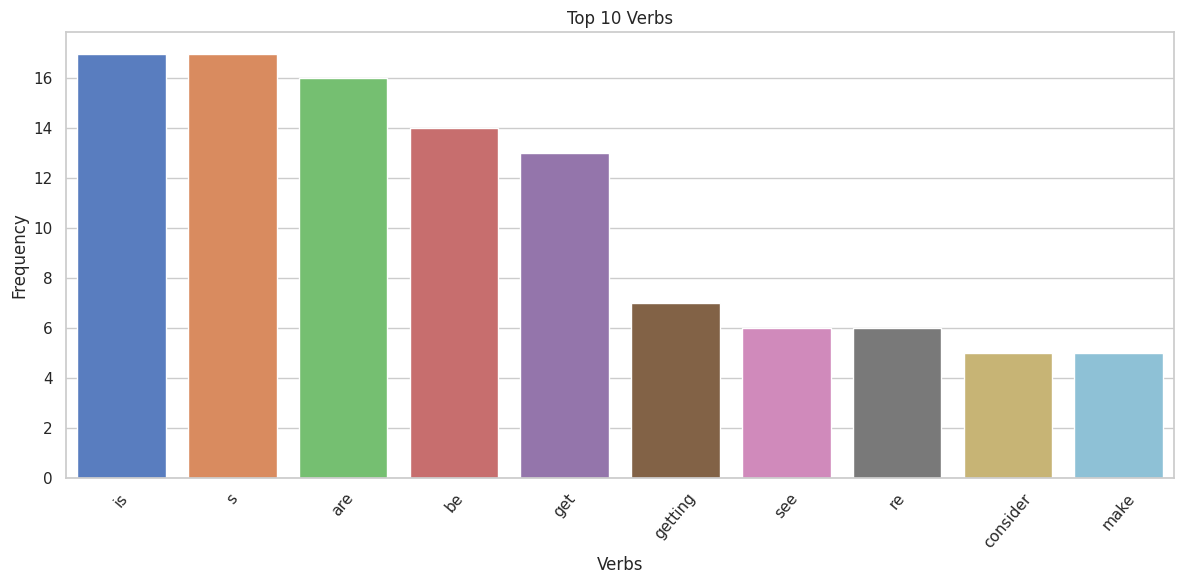

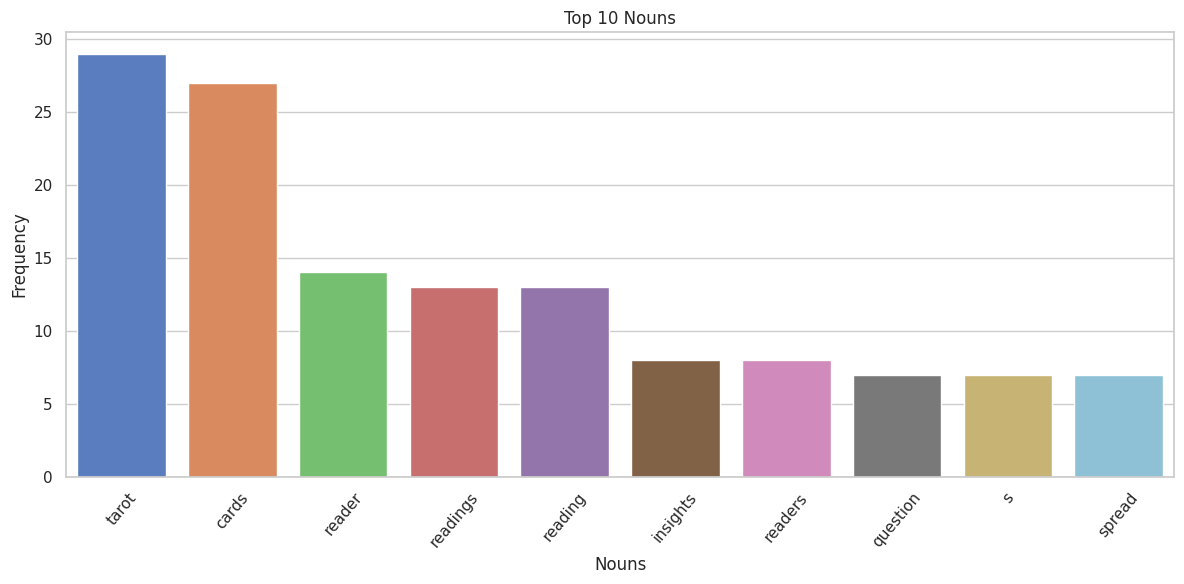

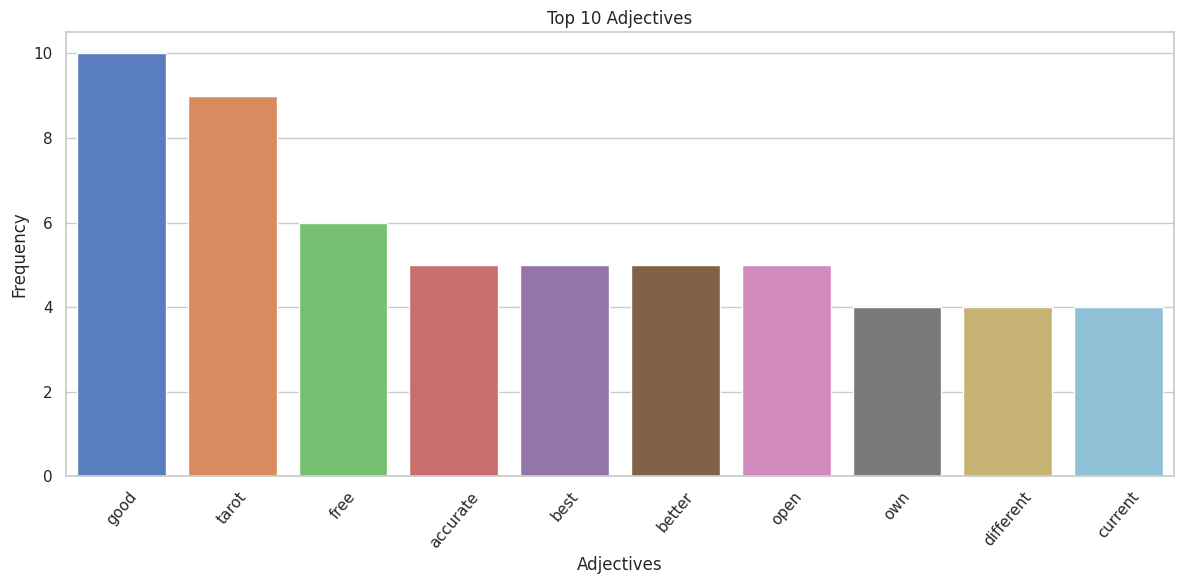

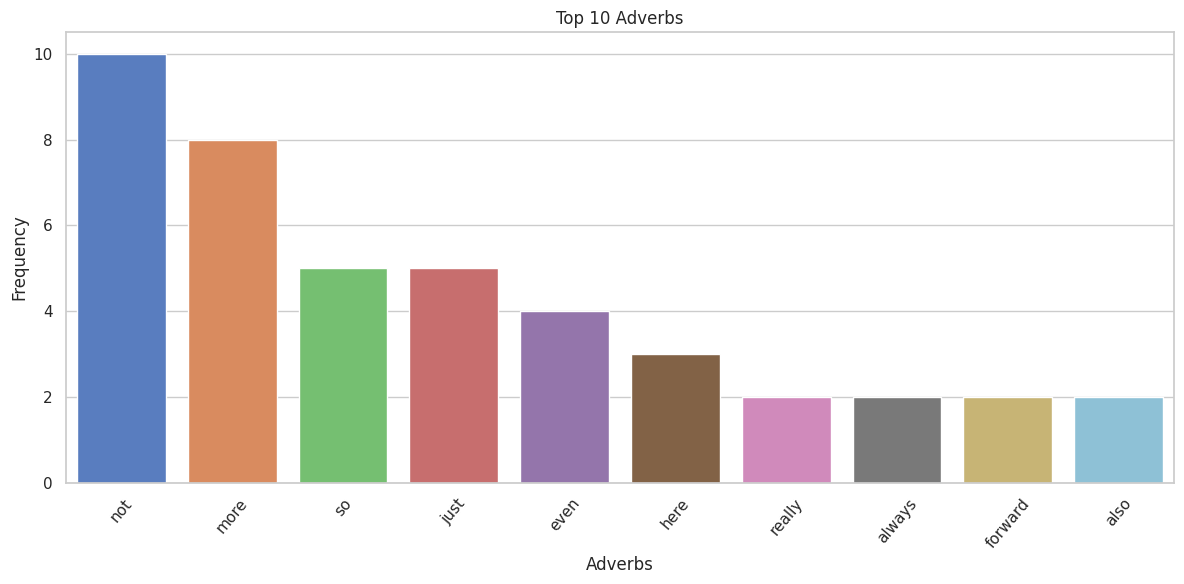

In [42]:
for cat, words in category_words.items():
  top_words = Counter(words).most_common(10)
  labels, counts = zip(*top_words)

  plt.figure(figsize=(12, 6))
  sns.barplot(x=list(labels), y=list(counts), palette="muted")
  plt.title(f"Top 10 {cat}")
  plt.ylabel("Frequency")
  plt.xlabel(f"{cat}")
  plt.xticks(rotation = 50)
  plt.tight_layout()
  plt.show()